# Exploration of SANDAG Data

### setup

In [50]:
%matplotlib inline
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

import matplotlib.cm

In [4]:
df_age = pd.read_excel("sandag.xlsx", sheetname="Age")
df_eth = pd.read_excel("sandag.xlsx", sheetname="Ethnicity")
df_house = pd.read_excel("sandag.xlsx", sheetname="Housing")
df_pop = pd.read_excel("sandag.xlsx", sheetname="Population")
df_income = pd.read_excel("sandag.xlsx", sheetname="Income")

In [11]:
df_pop_struct

POPULATION
CPA                       YEAR            
32nd Street Naval Station 2010        6530
                          2011        6935
                          2012        7152
                          2013        7370
                          2014        7598
                          2015        7641
                          2016        7577
Alpine                    2010       17344
                          2011       17158
                          2012       17310
                          2013       17522
                          2014       17738
                          2015       17876
                          2016       17913
Balboa Park               2010         200
                          2011         246
                          2012         256
                          2013         262
                          2014         270
                          2015         272
                          2016         270
Barona                    2010         546
                          2011         558
                          2012         569
                          2013         581
                          2014         751
                          2015         752
                          2016         745
Barrio Logan              2010        4865
                          2011        3862
...                                    ...
University                2015       68610
                          2016       69397
Uptown                    2010       37612
                          2011       38160
                          2012       39364
                          2013       40585
                          2014       41259
                          2015       42014
                          2016       42948
Valle De Oro              2010       40554
                          2011       40979
                          2012       41301
                          2013       41849
                          2014       42137
                          2015       42400
                          2016       42489
Valley Center             2010       19057
                          2011       18730
                          2012       18758
                          2013       18978
                          2014       19011
                          2015       19051
                          2016       19021
Via De La Valle           2010         423
                          2011         445
                          2012         443
                          2013         448
                          2014         465
                          2015         473
                          2016         476

[602 rows x 1 columns]

In [8]:
df_pop_struct = df_pop.groupby(['CPA', 'YEAR']).sum()

In [20]:
df_pop_struct = df_pop_struct.reset_index()

# Before Proceeding I would just like to say sorry for the really hacky code you are about to see. I just need this in the correct format ASAP!!!

In [38]:
df2 = {}
df2['2010'] = df_pop_struct[df_pop_struct['YEAR']==2010].set_index('CPA').drop('YEAR',axis=1)['POPULATION']
df2['2011'] = df_pop_struct[df_pop_struct['YEAR']==2011].set_index('CPA').drop('YEAR',axis=1)['POPULATION']
df2['2012'] = df_pop_struct[df_pop_struct['YEAR']==2012].set_index('CPA').drop('YEAR',axis=1)['POPULATION']
df2['2013'] = df_pop_struct[df_pop_struct['YEAR']==2013].set_index('CPA').drop('YEAR',axis=1)['POPULATION']
df2['2014'] = df_pop_struct[df_pop_struct['YEAR']==2014].set_index('CPA').drop('YEAR',axis=1)['POPULATION']
df2['2015'] = df_pop_struct[df_pop_struct['YEAR']==2015].set_index('CPA').drop('YEAR',axis=1)['POPULATION']
df2['2016'] = df_pop_struct[df_pop_struct['YEAR']==2016].set_index('CPA').drop('YEAR',axis=1)['POPULATION']

In [41]:
df2 = pd.concat(df2,axis=1)

In [45]:
df2 = df2.reset_index()

In [47]:
df2

,CPA,2010,2011,2012,2013,2014,2015,2016
0,32nd Street Naval Station,6530,6935,7152,7370,7598,7641,7577
1,Alpine,17344,17158,17310,17522,17738,17876,17913
2,Balboa Park,200,246,256,262,270,272,270
3,Barona,546,558,569,581,751,752,745
4,Barrio Logan,4865,3862,3859,3874,4194,4252,4241
5,Black Mountain Ranch,6517,6723,7404,7749,8322,10297,10958
6,Bonsall,10379,10214,10277,10415,10470,10557,10605
7,Carmel Mountain Ranch,12976,12649,12801,12955,13054,13117,13245
8,Carmel Valley,33844,34442,34945,35473,35639,35767,35928
9,Central Mountain,5106,4906,4967,5040,5125,5304,5388


In [48]:
df2.columns = ['neighborhood', '2010', '2011', '2012', '2013', '2014', '2015', '2016']

In [55]:
df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods['Name'] for neighborhoods in m.neighborhoods_info]
    })
df_poly

,neighborhood,shapes
0,Sun City,"Poly((17396.4, 165046) ...)"
1,Alviso,"Poly((-510647, 674237) ...)"
2,Santa Venetia,"Poly((-572997, 751713) ...)"
3,Marinwood,"Poly((-579789, 753065) ...)"
4,Newhall,"Poly((-131926, 256439) ...)"
5,Tujunga,"Poly((-105857, 236322) ...)"
6,Cabrillo,"Poly((-205122, 227434) ...)"
7,Shadow Hills,"Poly((-108476, 232751) ...)"
8,Sylmar,"Poly((-120895, 243789) ...)"
9,Presidio,"Poly((-569797, 722688) ...)"


In [60]:
df2["neighborhood"]= df2.neighborhood.str.upper()
df2

,neighborhood,2010,2011,2012,2013,2014,2015,2016
0,32ND STREET NAVAL STATION,6530,6935,7152,7370,7598,7641,7577
1,ALPINE,17344,17158,17310,17522,17738,17876,17913
2,BALBOA PARK,200,246,256,262,270,272,270
3,BARONA,546,558,569,581,751,752,745
4,BARRIO LOGAN,4865,3862,3859,3874,4194,4252,4241
5,BLACK MOUNTAIN RANCH,6517,6723,7404,7749,8322,10297,10958
6,BONSALL,10379,10214,10277,10415,10470,10557,10605
7,CARMEL MOUNTAIN RANCH,12976,12649,12801,12955,13054,13117,13245
8,CARMEL VALLEY,33844,34442,34945,35473,35639,35767,35928
9,CENTRAL MOUNTAIN,5106,4906,4967,5040,5125,5304,5388


In [63]:
df2= df2.replace("0", np.nan)

In [64]:
df2= df2.dropna()
print(df2)

                 neighborhood     2010     2011     2012     2013     2014  \
0   32ND STREET NAVAL STATION   6530.0   6935.0   7152.0   7370.0   7598.0   
1                      ALPINE  17344.0  17158.0  17310.0  17522.0  17738.0   
2                 BALBOA PARK    200.0    246.0    256.0    262.0    270.0   
3                      BARONA    546.0    558.0    569.0    581.0    751.0   
4                BARRIO LOGAN   4865.0   3862.0   3859.0   3874.0   4194.0   
5        BLACK MOUNTAIN RANCH   6517.0   6723.0   7404.0   7749.0   8322.0   
6                     BONSALL  10379.0  10214.0  10277.0  10415.0  10470.0   
7       CARMEL MOUNTAIN RANCH  12976.0  12649.0  12801.0  12955.0  13054.0   
8               CARMEL VALLEY  33844.0  34442.0  34945.0  35473.0  35639.0   
9            CENTRAL MOUNTAIN   5106.0   4906.0   4967.0   5040.0   5125.0   
10               CITY HEIGHTS  74062.0  73836.0  74326.0  75022.0  74947.0   
11            CLAIREMONT MESA  77922.0  77884.0  78366.0  79250.

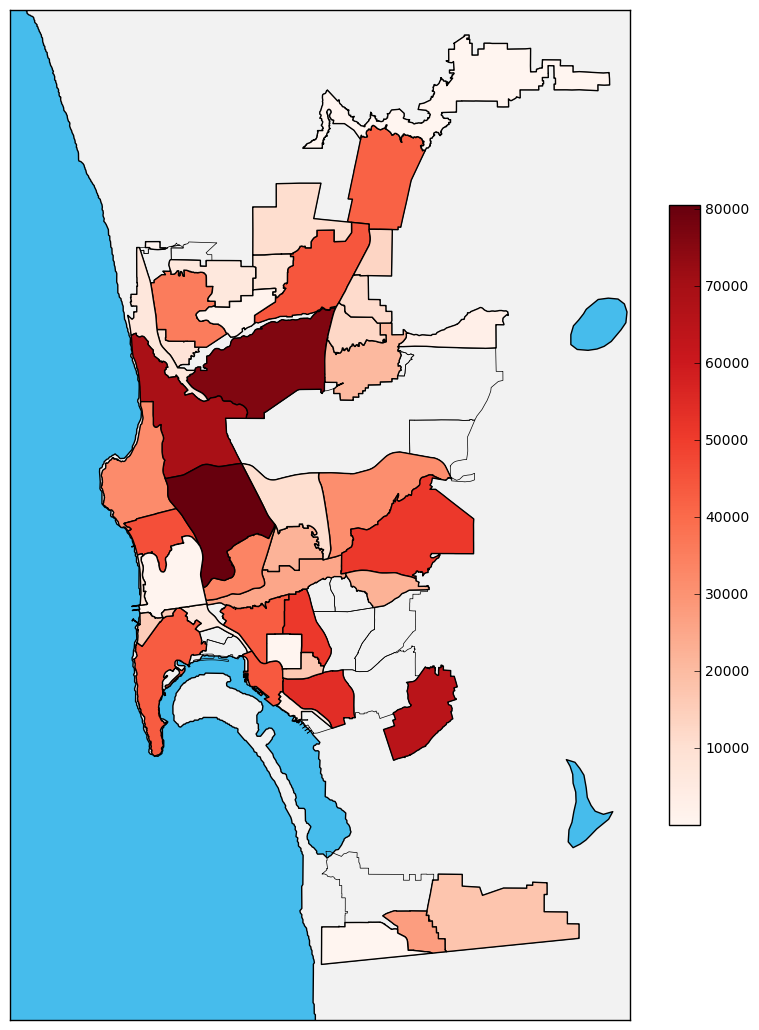

In [65]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df2, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Reds')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2016'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2016'])
plt.colorbar(mapper, shrink=0.4)

m

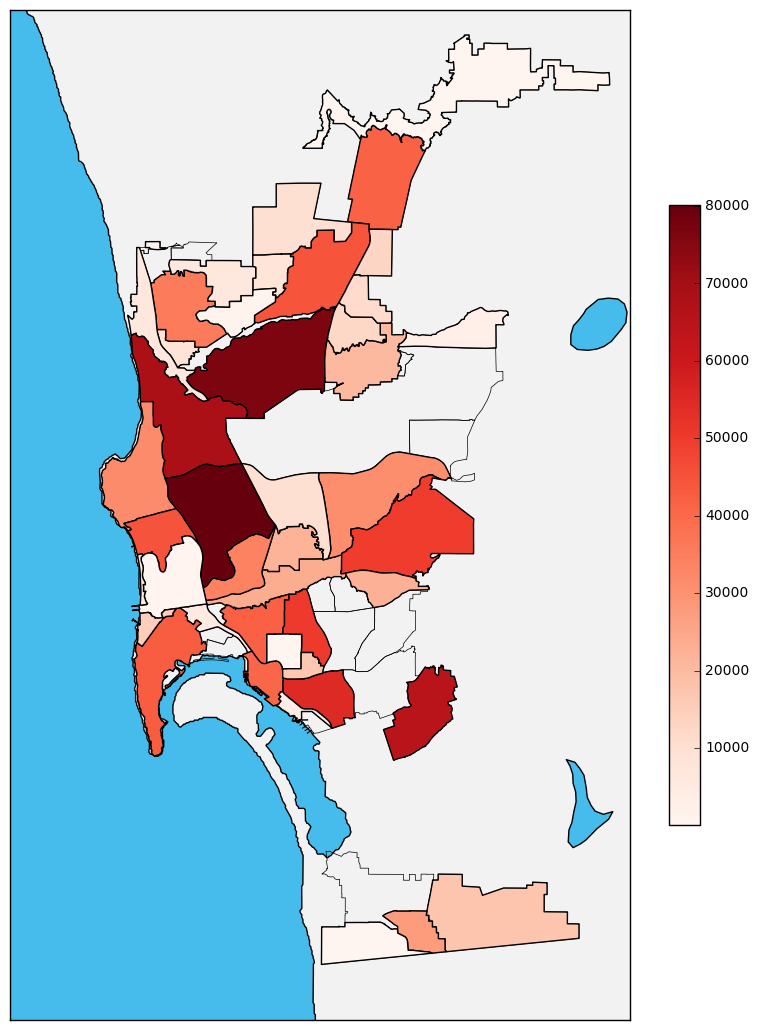

In [66]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df2, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Reds')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2015'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2015'])
plt.colorbar(mapper, shrink=0.4)

m

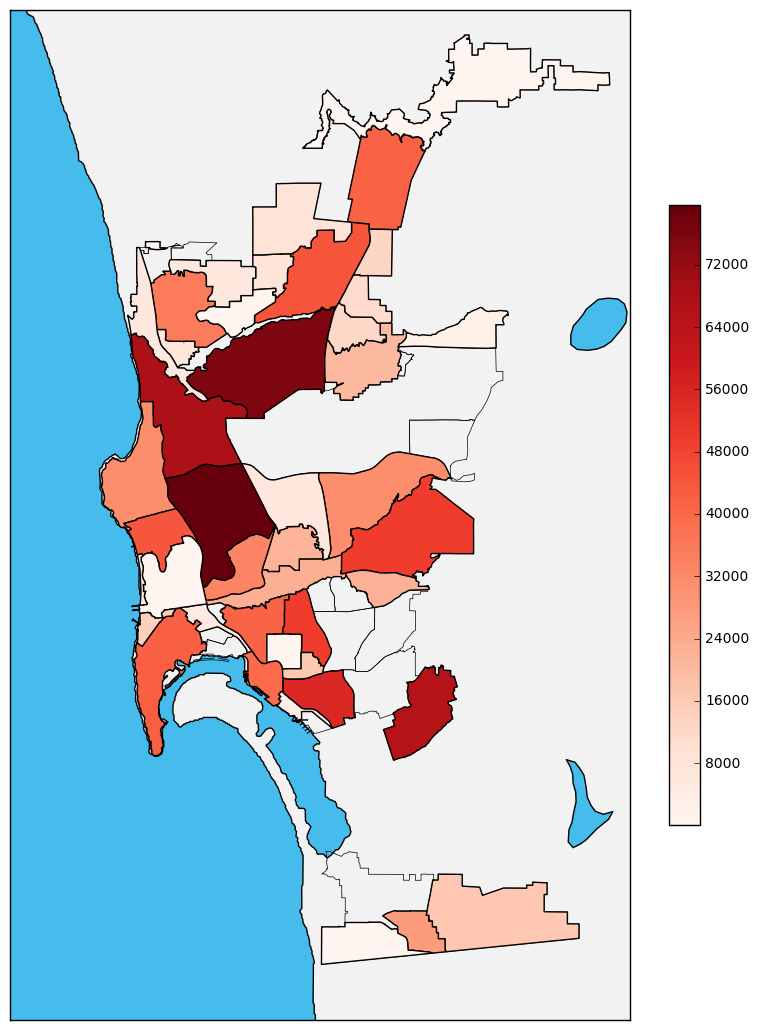

In [67]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df2, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Reds')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2014'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2014'])
plt.colorbar(mapper, shrink=0.4)

m

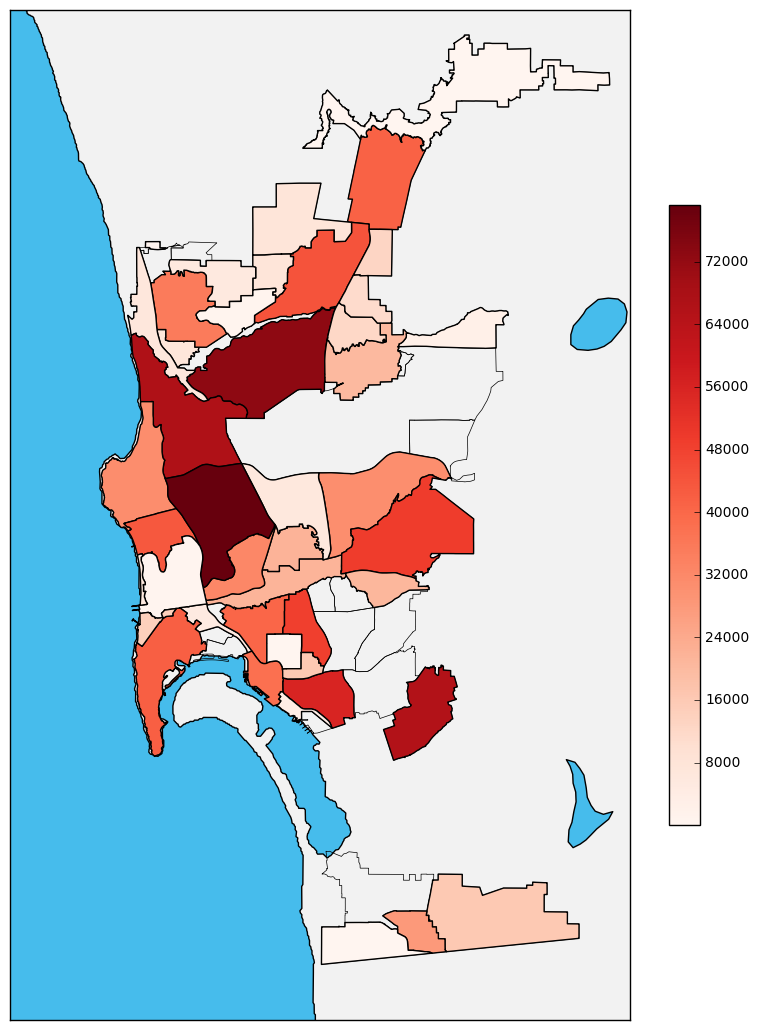

In [68]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df2, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Reds')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2013'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2013'])
plt.colorbar(mapper, shrink=0.4)

m

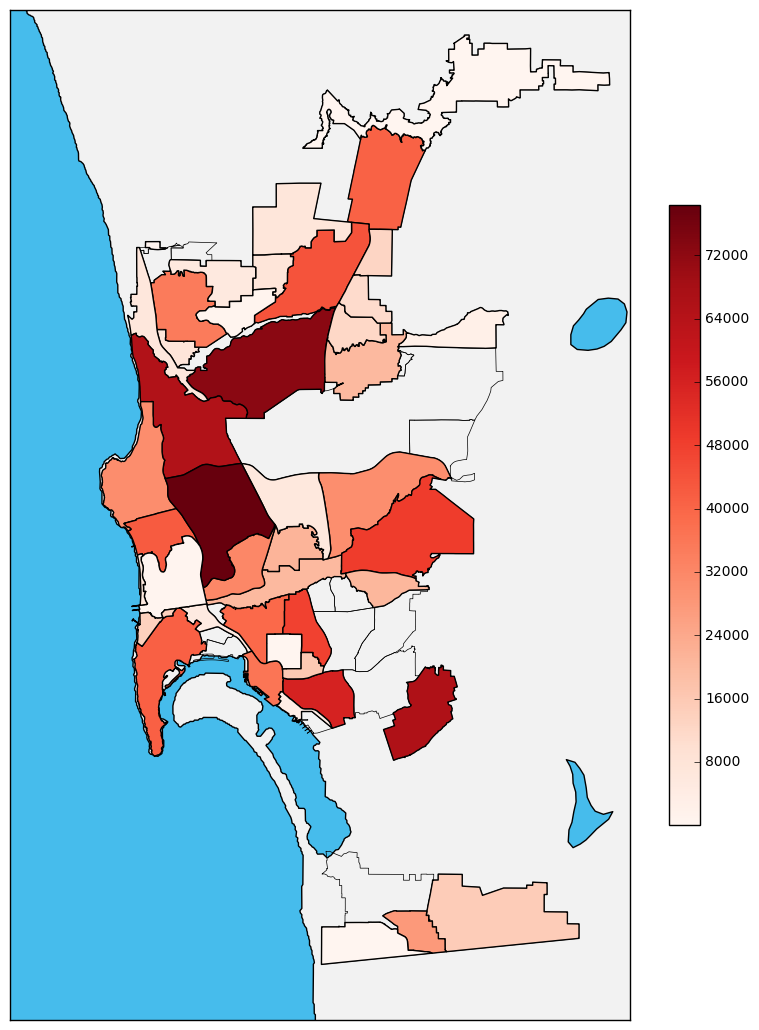

In [69]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df2, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Reds')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2012'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2012'])
plt.colorbar(mapper, shrink=0.4)

m

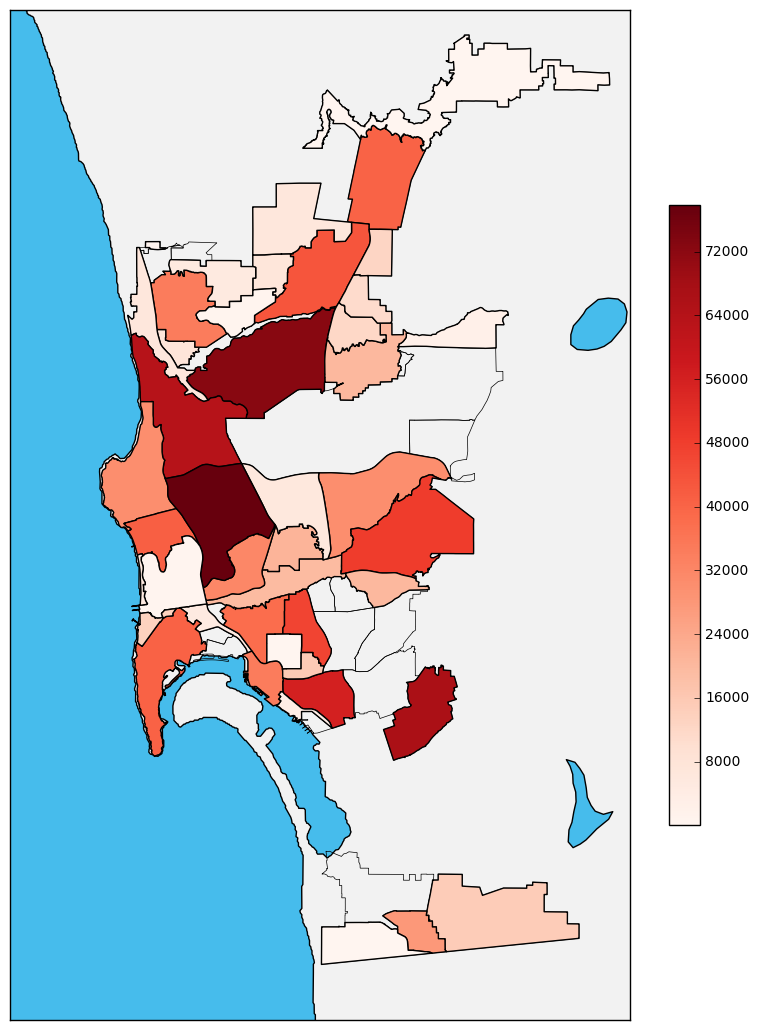

In [70]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df2, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Reds')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2011'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2011'])
plt.colorbar(mapper, shrink=0.4)

m

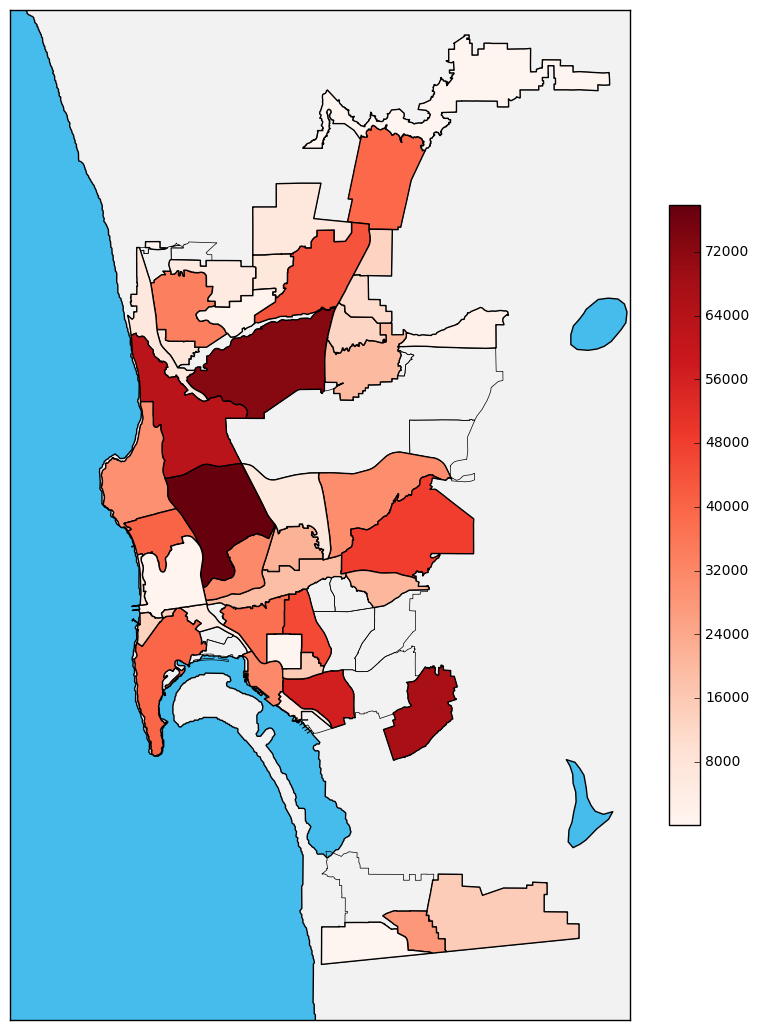

In [71]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df2, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Reds')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2010'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2010'])
plt.colorbar(mapper, shrink=0.4)

m